<a href="https://colab.research.google.com/github/tharun435/Data-Science-/blob/master/Classification_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#machine learning libraries for data manipulation
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import matplotlib.pyplot as plt
#preprocessing,metrics
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing ensemble algorithms
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier

#neural network libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Input
from xgboost import XGBClassifier


In [0]:
#data=pd.read_csv('data.csv')
#data.head(10)
datas=pd.read_csv('datasets - Sheet1.csv')
datas.head(20)

,cloud _cover(days),rainfall(mm),min_temp,obv_yield(kg/hect),pred_yield(kg/hect),labels
0,34.96,833.19,19.72,1092.7,1022.24,yes
1,33.96,1161.41,19.25,1060.8,1022.24,yes
2,34.04,938.17,19.83,1060.8,1022.24,yes
3,32.60,1033.26,20.06,1007.8,1022.24,no
4,34.86,1067.67,19.27,1022.2,1022.20,yes
5,34.70,833.15,20.24,1247.1,1022.24,yes
6,35.17,962.40,19.77,1146.6,1022.24,yes
7,31.76,693.67,19.93,1009.8,1022.24,yes
8,35.23,694.35,19.70,1160.1,1022.24,yes
9,33.14,692.42,20.08,985.8,1022.24,yes


In [0]:
print(datas.shape)
#print(datas.dtype)
print(datas.columns)
print(datas['labels'])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=datas['labels']
le.fit(['yes','no'])
x=le.transform(x)
print(x)
le.classes_
datas['labels']=x
datas.head(10)

(20, 6)
Index(['cloud _cover(days)', 'rainfall(mm)', 'min_temp', 'obv_yield(kg/hect)',
       'pred_yield(kg/hect)', 'labels'],
      dtype='object')
0     yes
1     yes
2     yes
3      no
4     yes
5     yes
6     yes
7     yes
8     yes
9     yes
10     no
11    yes
12    yes
13    yes
14    yes
15    yes
16    yes
17    yes
18    yes
19    yes
Name: labels, dtype: object
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


,cloud _cover(days),rainfall(mm),min_temp,obv_yield(kg/hect),pred_yield(kg/hect),labels
0,34.96,833.19,19.72,1092.7,1022.24,1
1,33.96,1161.41,19.25,1060.8,1022.24,1
2,34.04,938.17,19.83,1060.8,1022.24,1
3,32.60,1033.26,20.06,1007.8,1022.24,0
4,34.86,1067.67,19.27,1022.2,1022.20,1
5,34.70,833.15,20.24,1247.1,1022.24,1
6,35.17,962.40,19.77,1146.6,1022.24,1
7,31.76,693.67,19.93,1009.8,1022.24,1
8,35.23,694.35,19.70,1160.1,1022.24,1
9,33.14,692.42,20.08,985.8,1022.24,1


In [0]:
#peek over datasets,statistical description of the complete data
datas.describe()

,cloud _cover(days),rainfall(mm),min_temp,obv_yield(kg/hect),pred_yield(kg/hect),labels
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,34.119000,888.234500,19.684000,1017.735000,1022.238000,0.900000
std,0.863212,179.160581,0.351724,123.774478,0.008944,0.307794
min,31.760000,687.000000,18.980000,780.000000,1022.200000,0.000000
25%,33.857500,723.250000,19.445000,923.750000,1022.240000,1.000000
50%,34.085000,842.095000,19.710000,1009.400000,1022.240000,1.000000
75%,34.740000,980.115000,19.962500,1068.775000,1022.240000,1.000000
max,35.230000,1293.000000,20.240000,1275.000000,1022.240000,1.000000


In [0]:
#class Distribution
#for i in datas.columns:
#  print(datas.groupby(i).size())
datas.groupby('labels').size()

labels
0     2
1    18
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8A4C82588>,
      dtype=object)

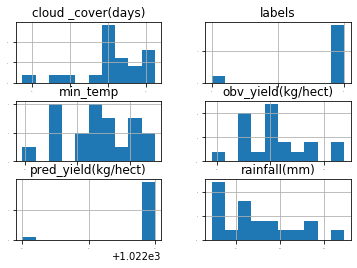

In [0]:
#unimodal visuals
datas.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D8A67255C0>,
      dtype=object)

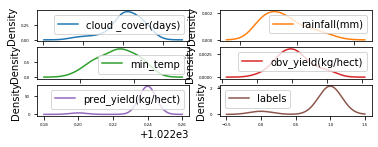

In [0]:
#density plots
datas.plot(kind='density',subplots=True,layout=(6,2),sharex=False,sharey=False,legend='none',fontsize=4)

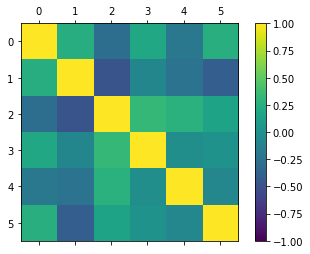

In [0]:
#Multi model Data Visuals
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(datas.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
plt.show()

In [0]:
#spliting dataset 
arr=datas.values
x=arr[:,:5]
y=arr[:,5]
validation_size=0.20#20%
seed=7#to produce the same results multiple times
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=seed)
(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

((16, 5), (4, 5), (16,), (4,))

In [0]:
#evaluation of algorithms
folds=5
seed=7
score='accuracy'

#testing on multiple models
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#results
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=folds,random_state=seed)
    cv_res=cross_val_score(model,x_train,y_train,cv=kfold,scoring=score)
    results.append(cv_res)
    names.append(name)
    message="classifier:{0}\nAccuracy:{1}\nstd_dev:{2}".format(name, cv_res.mean()*100,cv_res.std())
    print(message)
    print('\n')


classifier:LR
Accuracy:86.66666666666666
std_dev:0.26666666666666666


classifier:LDA
Accuracy:80.0
std_dev:0.26666666666666666


classifier:KNN
Accuracy:86.66666666666666
std_dev:0.16329931618554522


classifier:CART
Accuracy:80.0
std_dev:0.26666666666666666


classifier:NB
Accuracy:86.66666666666666
std_dev:0.16329931618554522


classifier:SVM
Accuracy:86.66666666666666
std_dev:0.16329931618554522




C:\Users\ritheesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritheesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritheesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritheesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ritheesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

[Text(0, 0, 'LR'),
 Text(0, 0, 'LDA'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'SVM')]

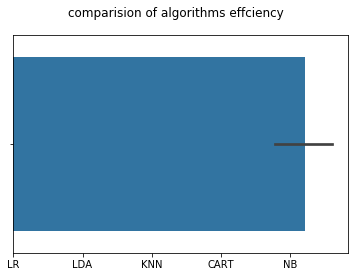

In [0]:
import seaborn as sns
fig=plt.figure()
fig.suptitle("comparision of algorithms effciency")
ax=fig.add_subplot(111)
sns.barplot(results)
ax.set_xticklabels(names)

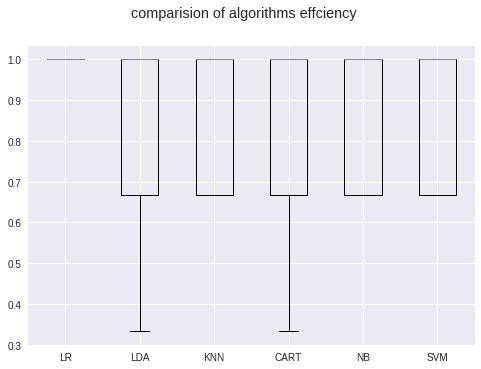

In [0]:
#comparing algorithms via box plot and whisker plot
fig=plt.figure()
fig.suptitle("comparision of algorithms effciency")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#ensembles
ea=[]

ea.append(('AdaBoost',AdaBoostClassifier()))
ea.append(('GradBoost',GradientBoostingClassifier()))
ea.append(('RandF',RandomForestClassifier()))
ea.append(('ET',ExtraTreesClassifier()))
ea.append(('XGB', XGBClassifier()))

#results prediction
results=[]
names=[]
for name,model in ea:
  kfold=KFold(n_splits=folds,random_state=seed)
  cv_res=cross_val_score(model,x_train,y_train,scoring=score)
  results.append(cv_res)
  names.append(name)
  output="Algorithm:{0}\nAccuracy:{1}\nStdDev:{2}".format(name,cv_res.mean(),cv_res.std())
  print("\n"+output)


Algorithm:AdaBoost
Accuracy:0.8055555555555557
StdDev:0.039283710065919325

Algorithm:GradBoost
Accuracy:0.8055555555555557
StdDev:0.039283710065919325

Algorithm:RandF
Accuracy:0.8055555555555557
StdDev:0.039283710065919325

Algorithm:ET
Accuracy:0.8055555555555557
StdDev:0.039283710065919325

Algorithm:XGB
Accuracy:0.888888888888889
StdDev:0.0785674201318386


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of me

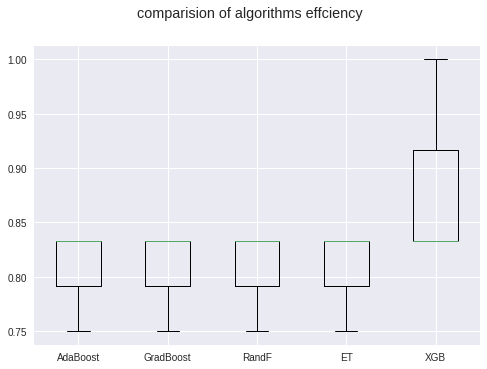

In [0]:
#comparing algorithms via box plot and whisker plot
fig=plt.figure()
fig.suptitle("comparision of algorithms effciency")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# ***plots***

In [0]:
data_viz=pd.read_csv('dat_visuals.csv')
print(data_viz.shape)
#print(datas.dtype)
print(data_viz.columns)
#print(datas['labels'])
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=data_viz['Year']
le.fit(x)
x=le.transform(x)
print(x)
le.classes_
data_viz['Year']=x
data_viz.head(10)

(9, 7)
Index(['Year', 'Rice', 'Wheat', 'Jowar', 'Bajra', 'Maize', 'soyabeans'], dtype='object')
[0 1 2 3 4 5 6 7 8]


,Year,Rice,Wheat,Jowar,Bajra,Maize,soyabeans
0,0,1986,2778,847,650,1792,1138
1,1,1901,2708,764,688,1822,822
2,2,2079,2762,771,869,2000,940
3,3,1744,2610,754,610,1681,762
4,4,2077,2713,716,1141,2041,1193
5,5,1984,2602,797,859,1907,908
6,6,2102,2619,880,802,1938,1073
7,7,2131,2708,844,886,1912,1062
8,8,2202,2802,1021,1042,2335,1235


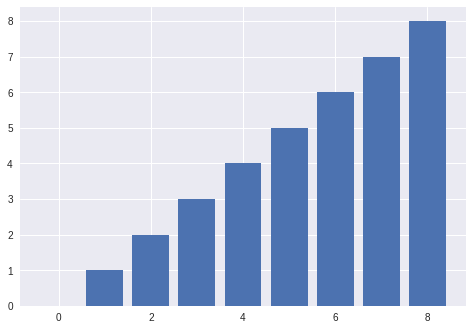

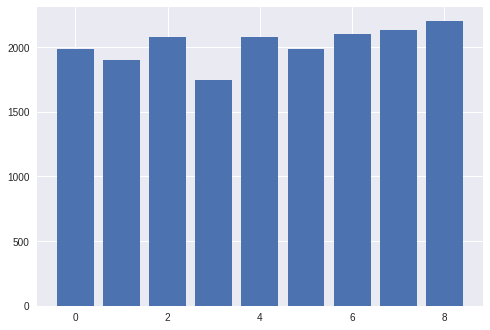

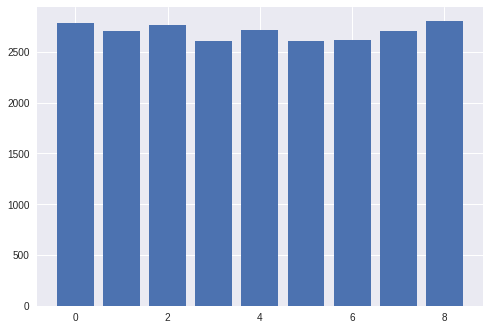

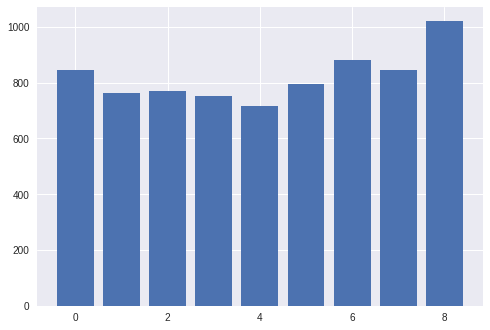

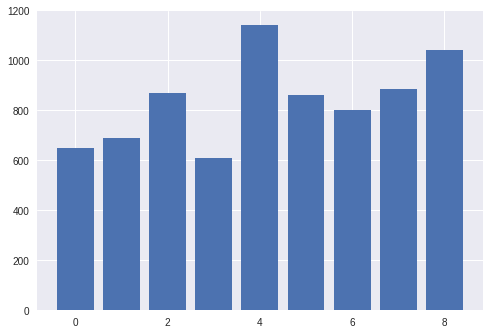

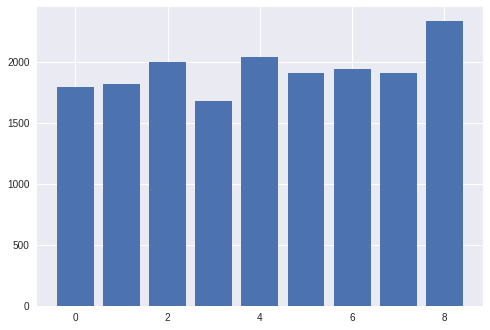

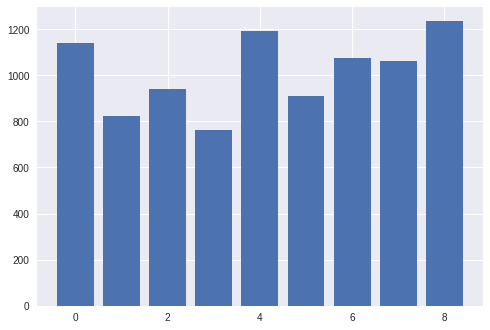

In [0]:
x=[0,1,2,3,4,5,6,7,8]
for i in data_viz.columns:
  plt.bar(x,data_viz[i])
  plt.show()


In [0]:
import os
os.system('faq.pdf')

0

In [0]:
'''import webbrowser
webbrowser.open(r'file:///faq.pdf')'''

"import webbrowser\nwebbrowser.open(r'file:///faq.pdf')"